# Inverting log-signatures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from esig import tosig

import base
import logsig_inversion
from utils.leadlag import leadlag

## Generate path

In [2]:
# Pip size
pip = 0.01

# Number of pips for search space
n_pips = 10

# Number of points
n_points = 21

path = np.r_[0., pip * np.random.randint(-n_pips, n_pips, size=n_points - 1).cumsum()]

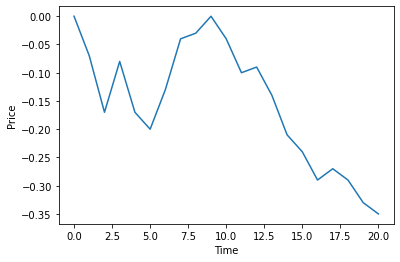

In [3]:
plt.plot(path)
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [4]:
# Compute log-signature

order = 4
leadlag_path = leadlag(path)
logsig = tosig.stream2logsig(leadlag_path, order)

print(f"Log-signature: {logsig}")

Log-signature: [-3.50000000e-01 -3.50000000e-01 -3.24500000e-02 -1.66391667e-03
 -1.45708333e-03  4.90750000e-05  1.22700417e-04  5.68600000e-05]


## Invert log-signature

In [5]:
n_iterations = 100
n_organisms = 1000
recovered_path, loss = logsig_inversion.train(logsig, order, n_iterations, n_organisms, n_points,
                                              pip, n_pips)

Loss: 0.0025550780596678663: 100%|██████████| 100/100 [01:48<00:00,  1.09s/it]


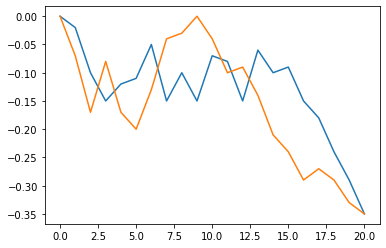

Real log-signature: [-3.50000000e-01 -3.50000000e-01 -3.24500000e-02 -1.66391667e-03
 -1.45708333e-03  4.90750000e-05  1.22700417e-04  5.68600000e-05]
Recovered log-signature: [-3.50000000e-01 -3.50000000e-01 -3.21500000e-02 -1.65991667e-03
 -1.43208333e-03  5.05850000e-05  1.19897917e-04  5.46150000e-05]


In [6]:
plt.plot(recovered_path)
plt.plot(path)
plt.show()
print(f"Real log-signature: {logsig}")
print(f"Recovered log-signature: {tosig.stream2logsig(leadlag(recovered_path), order)}")